# **Plant Seedlings Image Classification using Convoluted Neural Networks in Keras**

#### Gogolin 

### **Context:**
Utilize a dataset  of  images of  plant seedlings at various stages of  growth. Filename is the unique id for each plant.  The  dataset  has  12 differnt  plant  species.  Our objective is  to  create  a  classifier model  capable  of  determining  a plant's species from a photo.

### **Objective:**

Building a Convolutional Neural Network model to classify the plant seedlings into their respective categories using our classifier model.


### **Data Description:**

The datasets:

•images.npy

•Label.csv

These files originate from Kaggle. The images were converted to images.npy file with the labels in Labels.csv.  


####**You may want to use a GPU to process ** 






## **Importing the necessary libraries**

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import OpenCV 
import cv2
cv2.__version__

'4.7.0'

In [3]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [4]:
# Mount your Google drive to access the dataset 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/ML/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/ML/Labels.csv')

## **Description of the datasets**


Print the shape of the images and labels 

In [6]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


**Description**: The Images shape is 4 dimensions while the labels shape is only 2. This could be that the 2nd and 3rd dimension of the shape is the height and width of the image, therefore the images are square. The 4th dimension is probably RGB (Red, Green, Blue).

## Plotting images using OpenCV and matplotlib

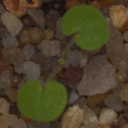

In [7]:
cv2_imshow(images[5])

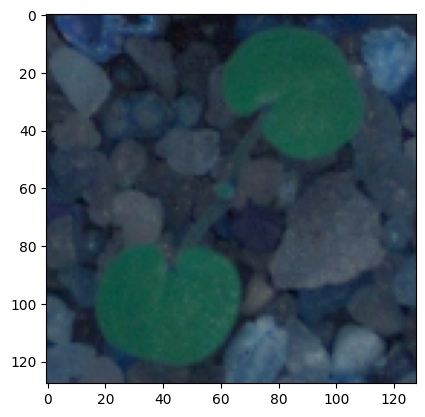

In [7]:
plt.imshow(images[5])

- The images are being shown in different colors when plotted with openCV and matplotlib.  OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Convert these BGR images to RGB images to interpret them easily.

In [8]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## **Exploratory Data Analysis** 

In [9]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

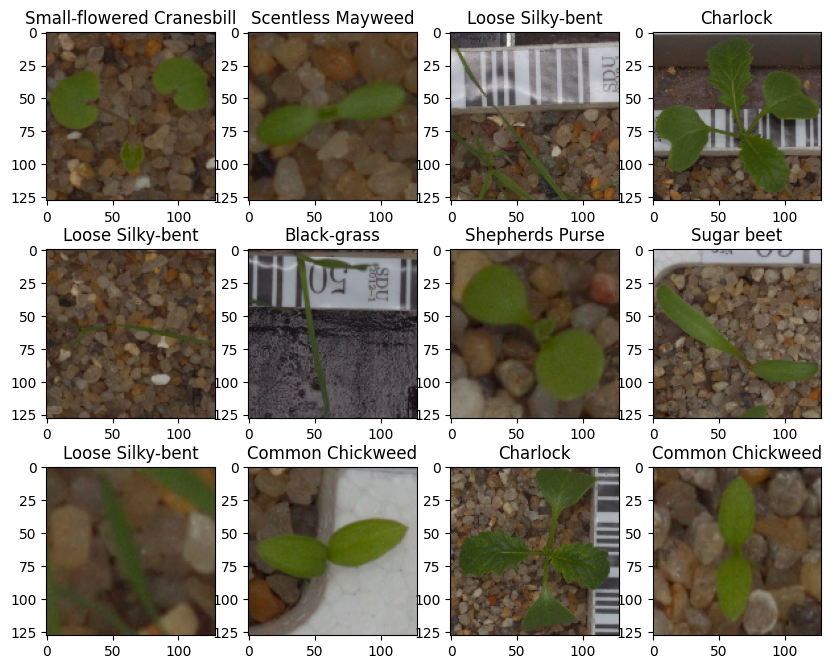

In [10]:
plot_images(images,labels)

<b> Checking for data imbalance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

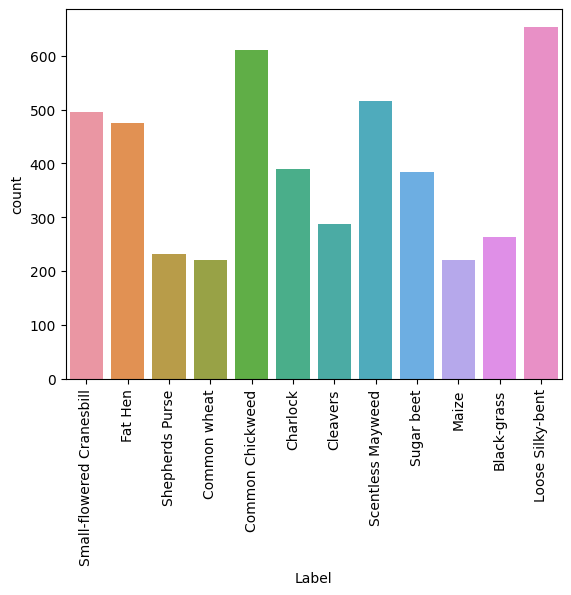

In [10]:
sns.countplot(data=labels, x='Label')
# rotate the lables
plt.xticks(rotation='vertical')

- Is the dataset balanced? 
- comment about results

**Comment**: The dataset doesn't look balanced. There is more Loose Silky-bent plants than any other. Common Wheat and Maize appear the least in the data set. 

### Resizing images 
Since the size of the images is large, it will be computationally intensive to train on these larger images so lets reduce the image size from 128 to 64.

In [11]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

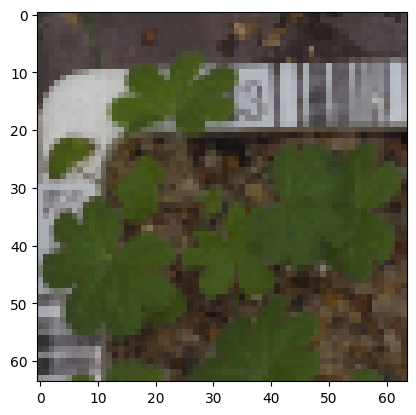

In [12]:
plt.imshow(images_decreased[3])

## Visualizing images using Gaussian Blur 

In [13]:
# Applying Gaussian Blur will denoise the images
images_gb=[]
for i in range(len(images)):
  #gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB) #- keep commented initially
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


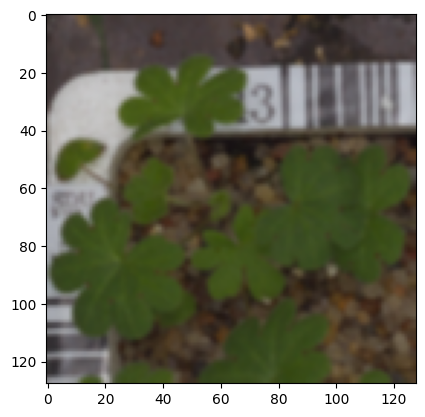

In [15]:
plt.imshow(images_gb[3])

**Comment**: The Gaussian Blue worked well. I think the picture looks more high quality now that I can't make out individual pixels.

## **Splitting the dataset**

- Let's use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.


In [14]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [15]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)




- Convert labels from names to one hot vectors to make data compatible
- Then normalizing the values


## Encoding the target labels

In [16]:
# Convert labels from names to one hot vectors.
# Labelbinarizer operates similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization via Scaling as image pixel values range from 0 to 255.  Divie the values by 255 to standardize values between 0 and 1.


In [17]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0




## Convolutional Neural Network (CNN) Model
Build a CNN model sequentially and add layers one after another.

Clear the previous model's history from the session. 

Keras uses a special command to clear the model's history - this keeps the previous model from remaining resident.

After clearing the model reset the seed.

Set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow.  This is in order to be able to reproduce the same results every time we run the code.

In [18]:
# Clearing history (backend)
from tensorflow.keras import backend
backend.clear_session()

In [19]:
# Set the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

CNN will have 2 main parts: <br>

- Feature Extraction Layer - made up of convolutional and pooling layers.
- Fully Conected Classification Layers - used for prediction




In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
# # model.add(Dense(10, activation='softmax'))
model.add(Dense(12, activation="softmax"))
# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

### <b> Fitting the model on the train data

In [ ]:
# note there are 30 epochs. This is the number of runs of the model.
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 51s - loss: 2.4534 - accuracy: 0.1258 - val_loss: 2.3999 - val_accuracy: 0.1495 - 51s/epoch - 423ms/step
Epoch 2/30
121/121 - 46s - loss: 2.3211 - accuracy: 0.1781 - val_loss: 2.1971 - val_accuracy: 0.2266 - 46s/epoch - 378ms/step
Epoch 3/30
121/121 - 42s - loss: 2.1247 - accuracy: 0.2423 - val_loss: 1.9983 - val_accuracy: 0.3294 - 42s/epoch - 349ms/step
Epoch 4/30
121/121 - 41s - loss: 2.0064 - accuracy: 0.2831 - val_loss: 1.8571 - val_accuracy: 0.3528 - 41s/epoch - 337ms/step
Epoch 5/30
121/121 - 42s - loss: 1.9794 - accuracy: 0.2849 - val_loss: 1.8021 - val_accuracy: 0.3528 - 42s/epoch - 349ms/step
Epoch 6/30
121/121 - 43s - loss: 1.9521 - accuracy: 0.2893 - val_loss: 1.7697 - val_accuracy: 0.3551 - 43s/epoch - 359ms/step
Epoch 7/30
121/121 - 44s - loss: 1.9287 - accuracy: 0.2771 - val_loss: 1.7389 - val_accuracy: 0.3621 - 44s/epoch - 362ms/step
Epoch 8/30
121/121 - 44s - loss: 1.8656 - accuracy: 0.2932 - val_loss: 1.6631 - val_accuracy: 0.3925 - 44s/epoch - 366

### **Model Evaluation**

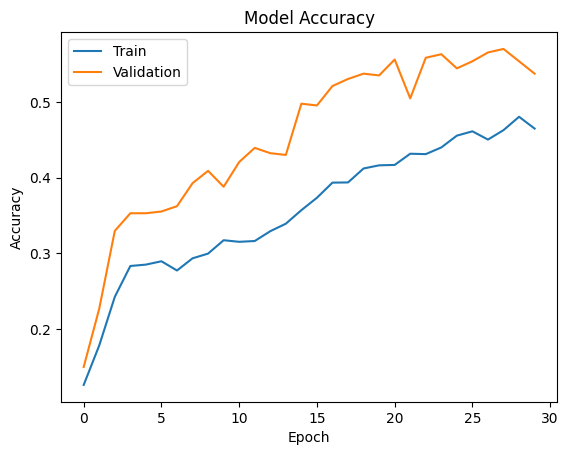

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   how did you do?
*   does the model overfit?






**Observations**: The validation data did significantly better than the train. This could mean that the data is overfit. The data for both the train and the test looks to follow a log base 2 for each epoch.

### **Evaluating the model on test data**

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.3609 - accuracy: 0.5516 - 1s/epoch - 69ms/step


### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 1s 86ms/step


In [ ]:
y_pred

array([[2.23175478e-09, 9.31636532e-06, 9.09884932e-08, ...,
        3.41052748e-02, 3.15952025e-06, 2.79781932e-04],
       [1.43884687e-13, 2.07838491e-02, 3.12940478e-01, ...,
        4.55699302e-03, 5.98172009e-01, 2.42029317e-02],
       [7.31196792e-07, 5.29407058e-03, 1.58452676e-04, ...,
        2.30582301e-02, 7.33193278e-01, 7.55098015e-02],
       ...,
       [2.20579520e-01, 6.81282336e-06, 1.02994340e-02, ...,
        7.75641411e-07, 4.68243172e-07, 8.40818062e-02],
       [1.01375804e-06, 8.31556041e-03, 2.73204353e-02, ...,
        1.01386316e-01, 9.58008168e-04, 1.65331457e-02],
       [2.33948649e-05, 2.49975286e-02, 1.17572341e-02, ...,
        1.56659886e-01, 2.61589885e-01, 2.02730402e-01]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined in TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. It is important to retrieve the categorical values from the encoded values.
*   Use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





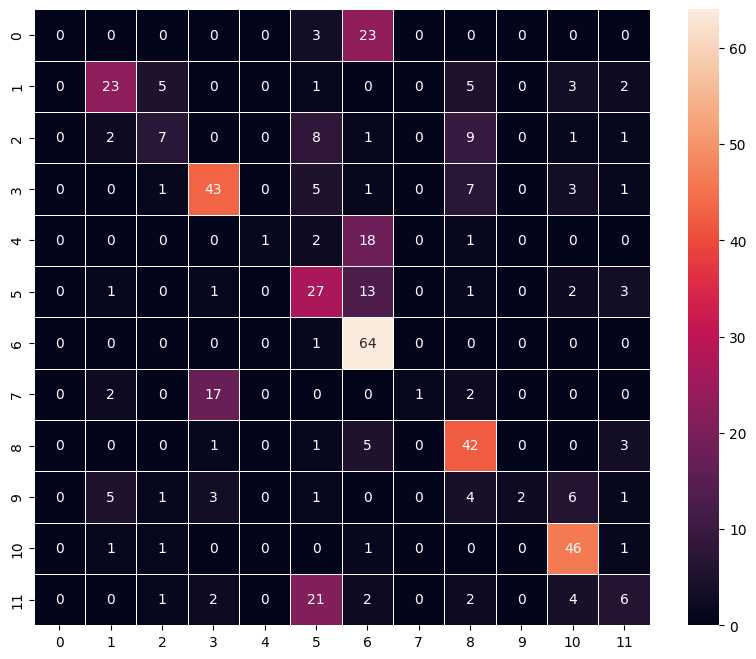

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- Are the classes predicted correctly?
- Are there any classes that are reasonably well classified?
- Are there classes that are mostly misclassified?

**Answer**: The 6's are doing very good (64/65). 0, 4, 7, 9 are doing bad (<=1/65) 3, 8, and 10, are doing just okay (mid 40's/65). Overall the classes are not good at predictions.


# **Plant Seedlings Image Classification using CNNs in Keras**

####  Gogolin - Model 2




# Model-2

The initial model appears to overfit and doesn't produce very strong results. To address this problem we can use data augmentation and Batch Normalization to expand our data to check if we can improve the model's performance.

## **Data Augmentation**

It can be challenging to acquire a large number of images in many real world scenarios and then train CNNs. To overcome this problem, one approach is **Data Augmentation**. CNNs have the property of **translational invariance**, which means an object can be recognized  even if its appearance has translational shift. <br> Because of this property we can augment the images using the following:  <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember, **data augmentation should only be used in the test data set -  not in the validation/test data set**.

In [20]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [25]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [31]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                      

In [32]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 9s 79ms/step - loss: 2.1934 - accuracy: 0.2292 - val_loss: 2.4138 - val_accuracy: 0.1519
Epoch 2/25
60/60 [==============================] - 5s 89ms/step - loss: 1.8206 - accuracy: 0.3608 - val_loss: 2.4205 - val_accuracy: 0.1893
Epoch 3/25
60/60 [==============================] - 4s 74ms/step - loss: 1.6001 - accuracy: 0.4481 - val_loss: 2.2206 - val_accuracy: 0.3995
Epoch 4/25
60/60 [==============================] - 6s 100ms/step - loss: 1.4828 - accuracy: 0.4917 - val_loss: 2.1424 - val_accuracy: 0.3014
Epoch 5/25
60/60 [==============================] - 5s 75ms/step - loss: 1.3953 - accuracy: 0.5213 - val_loss: 1.9150 - val_accuracy: 0.5888
Epoch 6/25
60/60 [==============================] - 6s 97ms/step - loss: 1.2778 - accuracy: 0.5554 - val_loss: 1.7705 - val_accuracy: 0.4953
Epoch 7/25
60/60 [==============================] - 4s 74ms/step - loss: 1.2148 - accuracy: 0.5620 - val_loss: 1.6208 - val_accuracy: 0.5841
Epoch 8/25
6

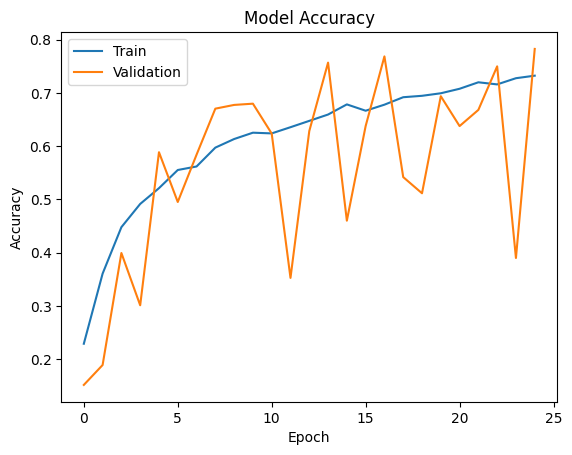

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.8764 - accuracy: 0.7453 - 128ms/epoch - 9ms/step


how have things changed compared to the first model?

**Answer**: The train and validation now seem to follow almost the exact same pattern. The validation is no longer much higher than the train and is less predictable in accuracy to epoch.


In [35]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 3ms/step


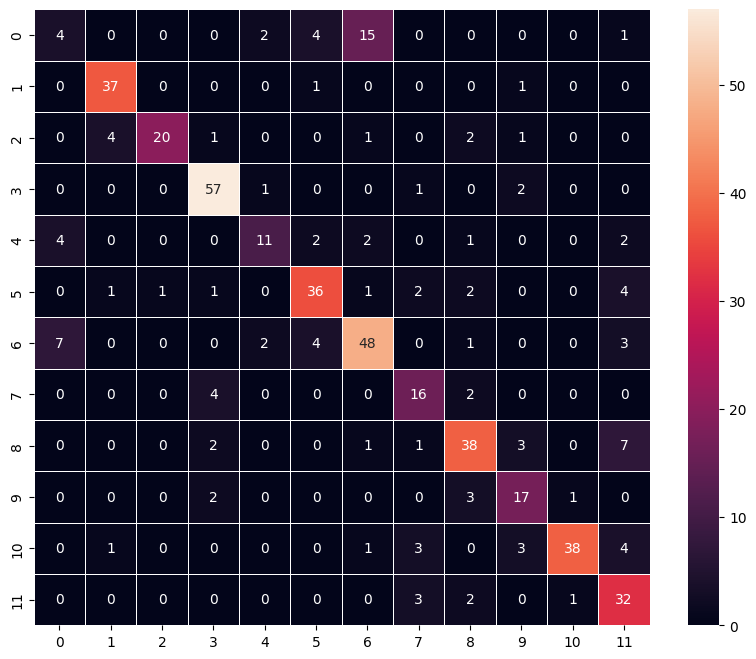

In [36]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Answer:** The classifications improved a whole lot more when compared with the model before the augmented. Interestingly, the classifications that were highly accurate dropped their accuracey by a decent amount (ex: 6's 64/64 -> 56/65) . There 0's are still some of the worst and are predicted wrongly more than right. This is something found with no other class. 

# **Plant Seedlings Image Classification Model 3**

#### Greg Gogolin 


# Transfer Learning using VGG16

- This model uses **Transfer Learning**. Load a pre-built architecture - named **VGG16**. This model was the runner-up in the ImageNet competition in 2014.

- For training VGG16use the convolutional and pooling layers and freeze their weights (no training will be done on them). For classification,  replace the existing fully-connected layers with FC layers created specifically for our problem.


In [21]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [22]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [23]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-tr

In [26]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 20s 131ms/step - loss: 2.4218 - accuracy: 0.1554 - val_loss: 2.2954 - val_accuracy: 0.2150
Epoch 2/25
60/60 [==============================] - 5s 80ms/step - loss: 2.2183 - accuracy: 0.2591 - val_loss: 2.1337 - val_accuracy: 0.3061
Epoch 3/25
60/60 [==============================] - 6s 100ms/step - loss: 2.0405 - accuracy: 0.2947 - val_loss: 1.9811 - val_accuracy: 0.3178
Epoch 4/25
60/60 [==============================] - 5s 81ms/step - loss: 1.8971 - accuracy: 0.3434 - val_loss: 1.8744 - val_accuracy: 0.3738
Epoch 5/25
60/60 [==============================] - 7s 123ms/step - loss: 1.7955 - accuracy: 0.3791 - val_loss: 1.7965 - val_accuracy: 0.4112
Epoch 6/25
60/60 [==============================] - 5s 83ms/step - loss: 1.7268 - accuracy: 0.3981 - val_loss: 1.7512 - val_accuracy: 0.4019
Epoch 7/25
60/60 [==============================] - 6s 103ms/step - loss: 1.6664 - accuracy: 0.4185 - val_loss: 1.7000 - val_accuracy: 0.4042
Epoch 8/

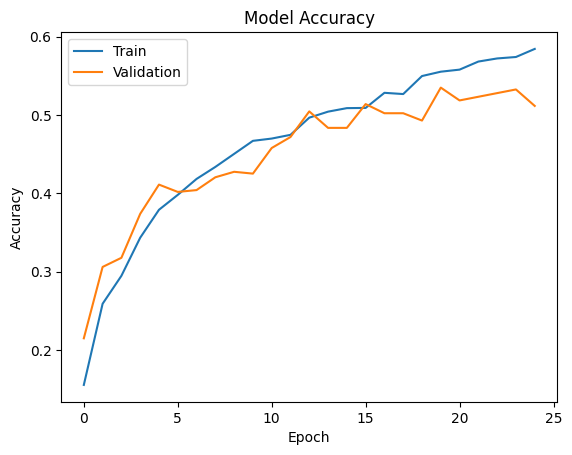

In [27]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.2676 - accuracy: 0.5684 - 841ms/epoch - 56ms/step


In [29]:
# output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 0s 17ms/step


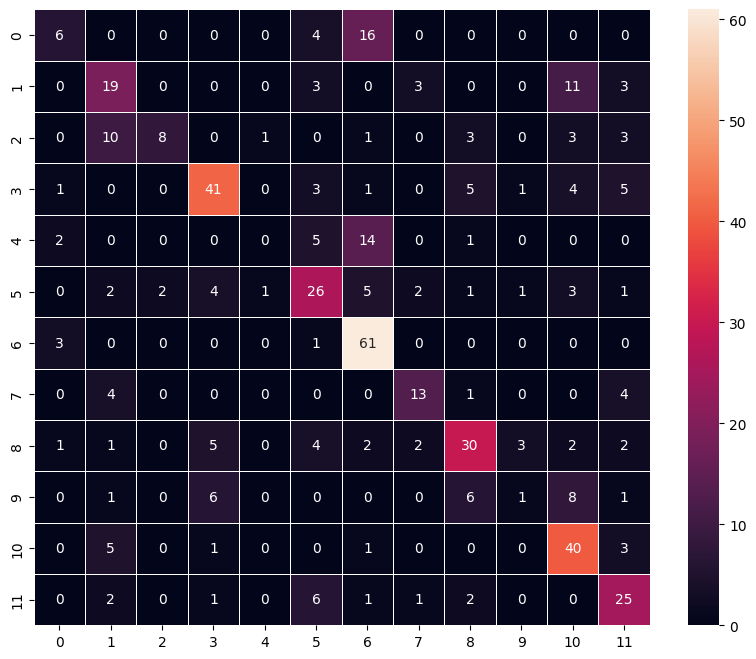

In [30]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Interpretation**: The 6 class improved but did not go back to its best form. The 9's don't look so good and neither do the 4's. In fact those are more likley to be missclassified. This doesn't look like the best model out of the bunch.

## **Visualizing the prediction:**

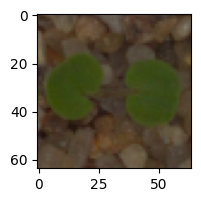

1/1 [==============================] - 0s 378ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


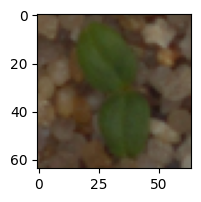

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Cleavers']
True Label Cleavers


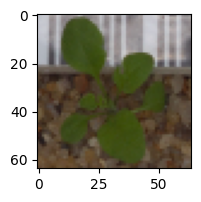

1/1 [==============================] - 0s 20ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [37]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

**Conclusion**: The VGG16 model was one that took the longest to run for me. From the confusion matrix, I thought it wasn't the best. Looking at the metrics later in the notebook, it seems to be the best. 

In [39]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['64%','70%','77%'],'Validation Accuracy':['48%','53%','63%'],'Test Accuracy':['51%','62%','63%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,64%,48%,51%
1,CNN Model with Data Augmentation,70%,53%,62%
2,Transfer Learning Model,77%,63%,63%


## Scope of Improvement
**Scope of Improvement**: We could always run the models more Epochs. We could add more images to the data set and more plants. We could have high quaility photos and low quility photos to see where the sweetspot for quality is. Maybe more research could be done to get the most updated and esteemed models to use on the data set. 